In [1]:
from itertools import combinations
from random import random
import numpy as np
import timeit 
class AdjNode:
    def __init__(self, value):
        self.vertex = value
        self.next = None
        self.color = None

class Graph:
    def __init__(self, num):
        self.V = num
        self.graph = [None] * self.V
    
    def add_edge(self, s, d):
        node = AdjNode(d)
        node.next = self.graph[s]
        self.graph[s] = node
        
        node = AdjNode(s)
        node.next = self.graph[d]
        self.graph[d] = node
        

    # Print the graph
    def print_agraph(self):
        for i in range(self.V):
            print("Vertex " + str(i) + ":", end="")
            temp = self.graph[i]
            while temp:
                print(" -> {}".format(temp.vertex), end="")
                temp = temp.next
            print(" \n")
            
    def vertex_degree(self):
        
        x = np.zeros(self.V)
        for i in range(self.V):
            count = 0;
            temp = self.graph[i]
            while temp:
                count = count + 1
                temp = temp.next
            x[count] = x[count] + 1
        return x
    
    
    
    def color(self):    
        node = np.zeros(self.V)
        for i in range(self.V):
            color = list(np.arange(1,1000,1))
            temp = self.graph[i]
            while temp:
                n = temp.vertex
                if(node[n] in color):
                    color.remove(node[n])
                temp = temp.next
            node[i] = min(color)
        return node
        
            
            
    def ER(self,p):
        n = self.V
        V = set([v for v in range(n)])
        for combination in combinations(V, 2):
            if random() <= p:
                self.add_edge(combination[0],combination[1])    
    ## change code
    def BFS2(self, root):
        graph = self.graph
        current_level = []
        current_level.append(root)
        level = 0;
        vs = set();
        vs.add(root)
        while(current_level != []):
            new =[]
            for neigh in current_level:
                node = graph[neigh]
                while(node != None):
                    d = node.vertex
                    if(d not in vs) :
                        vs.add(d)
                        new.append(d)
                    node = node.next
            current_level = new           
            level = level + 1        
        level = level - 1
        return level  
            
    def max_diameter(self):
        a = 0
        for i in range(self.V):
            a = max(self.BFS(i),a)
        return a
            
if __name__ == "__main__":
    graph = Graph(10)
    p = np.arange(0.002,0.022,0.002)
    q = np.zeros(len(p))
    for i in range(len(p)):
        graph.ER(p[i])
        r = graph.color()
        q[i] = max(r)  

In [6]:
print(sum(q)/len(q))

17.0


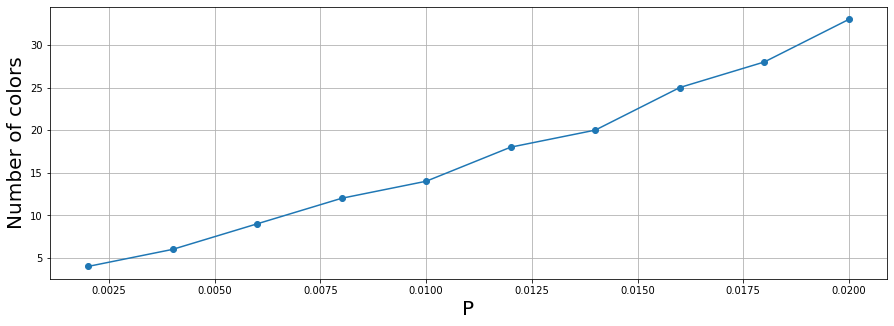

In [51]:
import matplotlib.pyplot as plt
import numpy as np

ax = plt.figure(figsize = (15,5))
plt.grid(True)

plt.plot(p,q,'o-')

plt.xlabel('P',fontsize = 20)
plt.ylabel('Number of colors',fontsize = 20)
plt.savefig('problem5.jpg')


In [52]:
print(q)

[ 4.  6.  9. 12. 14. 18. 20. 25. 28. 33.]


In [37]:
graph.print_agraph()

Vertex 0: -> 9 -> 8 -> 7 -> 6 -> 5 -> 4 -> 3 -> 2 -> 1 

Vertex 1: -> 9 -> 8 -> 7 -> 5 -> 4 -> 3 -> 2 -> 0 

Vertex 2: -> 9 -> 8 -> 7 -> 6 -> 5 -> 4 -> 3 -> 1 -> 0 

Vertex 3: -> 9 -> 8 -> 6 -> 5 -> 4 -> 2 -> 1 -> 0 

Vertex 4: -> 9 -> 8 -> 6 -> 3 -> 2 -> 1 -> 0 

Vertex 5: -> 9 -> 8 -> 6 -> 3 -> 2 -> 1 -> 0 

Vertex 6: -> 9 -> 8 -> 7 -> 5 -> 4 -> 3 -> 2 -> 0 

Vertex 7: -> 8 -> 6 -> 2 -> 1 -> 0 

Vertex 8: -> 9 -> 7 -> 6 -> 5 -> 4 -> 3 -> 2 -> 1 -> 0 

Vertex 9: -> 8 -> 6 -> 5 -> 4 -> 3 -> 2 -> 1 -> 0 

